## Part 1: Dask

In [34]:
import dask.dataframe as dd

# wordclouds imports
!pip install wordcloud -q
import matplotlib.pyplot as plt
from wordcloud import WordCloud

thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.11.22 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
# load in data
comments = dd.read_csv("*.csv")
comments.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [36]:
# check size
print ('Number of rows %d' % len(comments.index))
print ('Number of columns %d' % len(comments.columns))

Number of rows 1956
Number of columns 5


In [37]:
# count number of spam vs. non-spam
spam_count = len(comments[comments.CLASS == 1])
ham_count = len(comments[comments.CLASS == 0])
print ('Spam Count: %d' % spam_count)
print ('Ham Count: %d' % ham_count)

Spam Count: 1005
Ham Count: 951


In [38]:
# how many spam comments contain the word 'check'
# how many non-spam comments contain the word 'check'
check = comments[comments.CONTENT.str.lower().str.contains('check')]
spam_count = check.CLASS.sum().compute()
ham_count = len(check.index) - spam_count
print ('Spam Count: %d' % spam_count)
print ('Ham Count: %d' % ham_count)

Spam Count: 461
Ham Count: 19


In [39]:
spam_comments = comments[comments.CLASS == 1].CONTENT.compute()
spam_text = ' '.join([comment for comment in spam_comments.str.lower()])

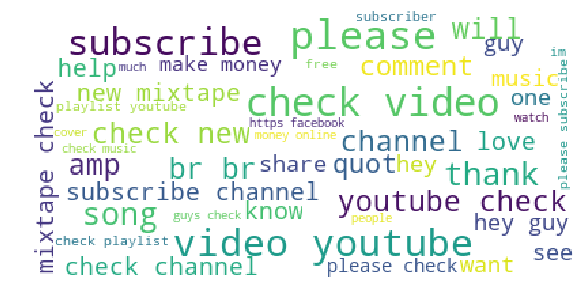

In [40]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(spam_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
ham_comments = comments[comments.CLASS == 0].CONTENT.compute()
ham_text = ' '.join([comment for comment in ham_comments.str.lower()])

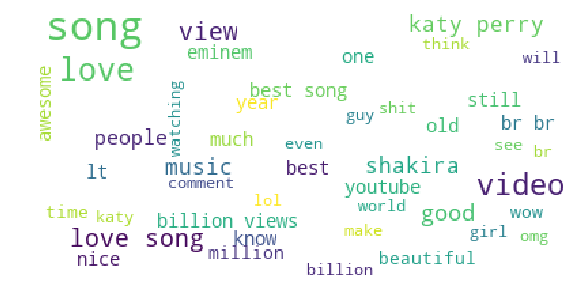

In [42]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(ham_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Part 2: Big Data Options

You've been introduced to a variety of platforms (AWS SageMaker, AWS EMR, Databricks), libraries (Numba, Dask, MapReduce, Spark), and languages (Python, SQL, Scala, Java) that can "scale up" or "scale out" for faster processing of big data.

Write a paragraph comparing some of these technology options. For example, you could describe which technology you may personally prefer to use, in what circumstances, for what reasons.

The correct tool choice is highly dependent on context. You should introduce just enough technical complexity to meet your technical challenges.

The first question I would ask myself is "does the task at hand run on my laptop without issuess?" If the answer is "Yes", Python and your choice of IDE/Notebook is optimal.

If your machine can't handle the computational load, the next step is to try a bigger machine. AWS offers a quick way to scale up the computing power, especially with the ease of SageMaker notebooks. With AWS SageMaker, try using tools like Numba or Dask to scale up and utilize parallel processing.

If data is too big to fit in memory on one machine, Spark (Scala or PySpark) is the tool of choice. Although it is still developing, Spark's DataFrame API does most of the optimization for you. This allows you and your team to keep code simple, and let Spark take care of the rest.